# Classifying CLAP(spam +non spam) using MLP architecture

## 3 Model Training and Evaluation 

### Load Preprocessed data 

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
import csv
import pandas as pd
import numpy as np
import librosa
import os,sys

import seaborn as sns
import wave
import librosa
import numpy as np
import scipy
from tqdm import tqdm_notebook
import matplotlib.pyplot as plt
import IPython.display as ipd  # to play sound in notebook

from keras import Sequential
from keras.utils import Sequence, to_categorical
from sklearn.preprocessing import LabelEncoder
from keras import losses, models, optimizers
from keras.activations import relu, softmax
from keras.layers import Dense, Dropout, Input, Convolution2D, BatchNormalization, Activation, MaxPool2D, Flatten
from sklearn.metrics import confusion_matrix

%matplotlib inline

In [ ]:
ROOT_PATH='./drive/MyDrive/ASR_Project_Shared/'

## Creating a softlink to drive root, easy for relative addressing

## Guys 


relative_path = 'final_metadata/denoised/'



nb_path = './normal'
os.symlink(ROOT_PATH+'final_metadata/normal', nb_path)
sys.path.insert(0, nb_path) 


nb_path = './denoised'
os.symlink(ROOT_PATH+'final_metadata/denoised', nb_path)
sys.path.insert(0, nb_path) 



nb_path = './final_data'
os.symlink(ROOT_PATH+'final_data', nb_path)
sys.path.insert(0, nb_path) 


metadata_file = 'train_metadata_speech{all_clap}_noise{all_clap+noiseclips}.csv'

pickle_file_name = metadata_file +'.pkl'
nb_path = './'+ metadata_file
os.symlink(ROOT_PATH+relative_path+metadata_file, nb_path)
sys.path.insert(0, nb_path) 

nb_path = './'+ pickle_file_name
os.symlink(ROOT_PATH+relative_path+pickle_file_name, nb_path)
sys.path.insert(0, nb_path) 

metadata_file = 'test_metadata_speech{all_clap}_noise{qut+spam} - test_metadata_speech{all_clap}_noise{qut+spam}.csv'

pickle_file_name = metadata_file +'.pkl'
nb_path = './'+ metadata_file
os.symlink(ROOT_PATH+relative_path+metadata_file, nb_path)
sys.path.insert(0, nb_path) 

nb_path = './'+ pickle_file_name
os.symlink(ROOT_PATH+relative_path+pickle_file_name, nb_path)
sys.path.insert(0, nb_path) 

metadata_file = 'test_metadata_speech{all_clap}_noise{all_clap+noiseclips+spam} - test_metadata_speech{all_clap}_noise{all_clap+noiseclips+spam}.csv'

pickle_file_name = metadata_file +'.pkl'
nb_path = './'+ metadata_file
os.symlink(ROOT_PATH+relative_path+metadata_file, nb_path)
sys.path.insert(0, nb_path) 

nb_path = './'+ pickle_file_name
os.symlink(ROOT_PATH+relative_path+pickle_file_name, nb_path)
sys.path.insert(0, nb_path) 

FileExistsError: ignored

[]

In [ ]:
# # retrieve the preprocessed data from previous notebook

# %store -r x_train 
# %store -r x_test 
# %store -r y_train 
# %store -r y_test 
# %store -r yy 
# %store -r le

import pickle
featuresdf =  pickle.load( open( "train_metadata_speech{all_clap}_noise{all_clap+noiseclips}.csv.pkl", "rb" ) )
#featuresdf = featuresdf.sample(frac=1).reset_index(drop=True)
features_marathidf = pickle.load( open( "test_metadata_speech{all_clap}_noise{qut+spam} - test_metadata_speech{all_clap}_noise{qut+spam}.csv.pkl", "rb" ) )
#features_marathidf = features_marathidf.sample(frac=1).reset_index(drop=True)
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

# Convert features and corresponding classification labels into numpy arrays
X = np.array(featuresdf.feature.tolist())
y = np.array(featuresdf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 
# split the dataset 
from sklearn.model_selection import train_test_split 

#x_train, x_test, y_train, y_test = train_test_split(X, yy, test_size=0.2, random_state = 42)

x_train = X
y_train = yy


X = np.array(features_marathidf.feature.tolist())
y = np.array(features_marathidf.class_label.tolist())

# Encode the classification labels
le = LabelEncoder()
yy = to_categorical(le.fit_transform(y)) 

x_test = X
y_test = yy

In [ ]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [0., 1.],
       [0., 1.]], dtype=float32)

### Initial model architecture - MLP

We will start with constructing a Multilayer Perceptron (MLP) Neural Network using Keras and a Tensorflow backend. 

Starting with a `sequential` model so we can build the model layer by layer. 

We will begin with a simple model architecture, consisting of three layers, an input layer, a hidden layer and an output layer. All three layers will be of the `dense` layer type which is a standard layer type that is used in many cases for neural networks. 

The first layer will receive the input shape. As each sample contains 40 MFCCs (or columns) we have a shape of (1x40) this means we will start with an input shape of 40. 

The first two layers will have 256 nodes. The activation function we will be using for our first 2 layers is the `ReLU`, or `Rectified Linear Activation`. This activation function has been proven to work well in neural networks.

We will also apply a `Dropout` value of 50% on our first two layers. This will randomly exclude nodes from each update cycle which in turn results in a network that is capable of better generalisation and is less likely to overfit the training data.

Our output layer will have 10 nodes (num_labels) which matches the number of possible classifications. The activation is for our output layer is `softmax`. Softmax makes the output sum up to 1 so the output can be interpreted as probabilities. The model will then make its prediction based on which option has the highest probability.

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D , Conv2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

num_labels = yy.shape[1]
filter_size = 2

# Construct model 
model = Sequential()

model.add(Dense(256, input_shape=(40,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(256))
model.add(Activation('relu'))
model.add(Dropout(0.5))

model.add(Dense(num_labels))
model.add(Activation('softmax'))

In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D , Conv2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

### Compiling the model 

For compiling our model, we will use the following three parameters: 

* Loss function - we will use `categorical_crossentropy`. This is the most common choice for classification. A lower score indicates that the model is performing better.

* Metrics - we will use the `accuracy` metric which will allow us to view the accuracy score on the validation data when we train the model. 

* Optimizer - here we will use `adam` which is a generally good optimizer for many use cases.


In [ ]:
# Compile the model
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam') 

In [ ]:
# Display model architecture summary 
model.summary()

# Calculate pre-training accuracy 
score = model.evaluate(x_test, y_test, verbose=0)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy)

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 256)               10496     
_________________________________________________________________
activation_6 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 256)               65792     
_________________________________________________________________
activation_7 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                

### Training 

Here we will train the model. 

We will start with 100 epochs which is the number of times the model will cycle through the data. The model will improve on each cycle until it reaches a certain point. 

We will also start with a low batch size, as having a large batch size can reduce the generalisation ability of the model. 

In [ ]:
from keras.callbacks import ModelCheckpoint 
from datetime import datetime 

num_epochs = 10
num_batch_size = 32

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_mlp.hdf5', 
                               verbose=1, save_best_only=True)
start = datetime.now()

model.fit(x_train, y_train, batch_size=num_batch_size, epochs=num_epochs, validation_data=(x_test, y_test), callbacks=[checkpointer], verbose=1)


duration = datetime.now() - start
print("Training completed in time: ", duration)

Epoch 1/10
141/141 [==============================] - 1s 4ms/step - loss: 8.6341 - accuracy: 0.8255 - val_loss: 1.8351 - val_accuracy: 0.9259

Epoch 00001: val_loss improved from inf to 1.83513, saving model to saved_models/weights.best.basic_mlp.hdf5
Epoch 2/10
141/141 [==============================] - 0s 3ms/step - loss: 2.0492 - accuracy: 0.9026 - val_loss: 0.5464 - val_accuracy: 0.9220

Epoch 00002: val_loss improved from 1.83513 to 0.54642, saving model to saved_models/weights.best.basic_mlp.hdf5
Epoch 3/10
141/141 [==============================] - 0s 3ms/step - loss: 0.9655 - accuracy: 0.9039 - val_loss: 0.2960 - val_accuracy: 0.9181

Epoch 00003: val_loss improved from 0.54642 to 0.29595, saving model to saved_models/weights.best.basic_mlp.hdf5
Epoch 4/10
141/141 [==============================] - 0s 3ms/step - loss: 0.5392 - accuracy: 0.9051 - val_loss: 0.3398 - val_accuracy: 0.9230

Epoch 00004: val_loss did not improve from 0.29595
Epoch 5/10
141/141 [======================

### Test the model 

Here we will review the accuracy of the model on both the training and test data sets. 

In [ ]:
# Evaluating the model on the training and testing set
score = model.evaluate(x_train, y_train, verbose=0)
print("Training Accuracy: ", score[1])

score = model.evaluate(x_test, y_test, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  0.9587697982788086
Testing Accuracy:  0.9288498759269714


In [ ]:
y_pred = (model.predict(x_test) > 0.5).astype(int)

In [ ]:
y_pred_ = model.predict(x_test, use_multiprocessing=True, workers=6, verbose=1)


33/33 [==============================] - 0s 1ms/step


In [ ]:

def plot_confusion_matrix(y_true, y_pred, labels):
    """
    plots the confusion matrix
    """
    matrix = confusion_matrix(y_true, y_pred)    
    fig, ax = plt.subplots(figsize=(4,3))
    plt.imshow(matrix)
    ax.set_xticks(range(len(labels)));
    ax.set_xticklabels(labels, rotation=0)
    ax.set_yticks(range(len(labels)));
    ax.set_yticklabels(labels)
    max_confusions = 0
    confused_classes = (-1, -1)
    for i, true_label in enumerate(matrix):
        for j, predicted_label in enumerate(true_label):
            text = ax.text(j, i, matrix[i, j],
                        ha="center", va="center", color="r");
    plt.tick_params(axis=u'both', which=u'both',length=0)
    plt.title("Confusion Matrix");


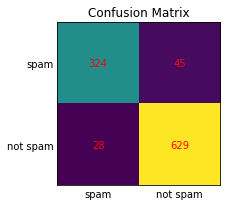

In [ ]:

y_pred = np.argmax(y_pred_, axis=1)
y_true = np.argmax(y_test, axis=1)
#labels = []_
labels =['spam','not spam']

plot_confusion_matrix(y_true, y_pred, labels)

The initial Training and Testing accuracy scores are quite high. As there is not a great difference between the Training and Test scores (~5%) this suggests that the model has not suffered from overfitting. 

### Predictions  

Here we will build a method which will allow us to test the models predictions on a specified audio .wav file. 

In [ ]:
import librosa 
import numpy as np 

def extract_feature(file_name):
   
    try:
        audio_data, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 
        mfccs = librosa.feature.mfcc(y=audio_data, sr=sample_rate, n_mfcc=40)
        mfccsscaled = np.mean(mfccs.T,axis=0)
        
    except Exception as e:
        print("Error encountered while parsing file: ", file)
        return None, None

    return np.array([mfccsscaled])


In [ ]:
def print_prediction(file_name):
    prediction_feature = extract_feature(file_name) 

    predicted_vector = model.predict_classes(prediction_feature)
    predicted_class = le.inverse_transform(predicted_vector) 
    print("The predicted class is:", predicted_class[0], '\n') 

    predicted_proba_vector = model.predict_proba(prediction_feature) 
    predicted_proba = predicted_proba_vector[0]
    for i in range(len(predicted_proba)): 
        category = le.inverse_transform(np.array([i]))
        print(category[0], "\t\t : ", format(predicted_proba[i], '.32f') )

### Validation 

#### Test with sample data 

Initial sainity check to verify the predictions using a subsection of the sample audio files we explored in the first notebook. We expect the bulk of these to be classified correctly. 

In [ ]:
# Class: Air Conditioner

filename = 'final_data/noise/CAFE-CAFE-1_trim_5s_505.wav' 
print_prediction(filename) 

The predicted class is: 1 

0 		 :  0.00000000002346651345463968141303
1 		 :  1.00000000000000000000000000000000


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '
/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:425: UserWarning: `model.predict_proba()` is deprecated and will be removed after 2021-01-01. Please use `model.predict()` instead.
  warnings.warn('`model.predict_proba()` is deprecated and '
